## Bayesian Network
* Guassian Naive Bayes

### Gaussian Naive Bayes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]
classes = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}

In [2]:
# read data
# data = np.loadtxt('Data-and-Output/8.iris.data', dtype=float, delimiter=',', converters={4: iris_type})
data = np.loadtxt('Data-and-Output/8.iris.data', dtype=float, delimiter=',', converters={4: lambda x: classes[x]})

# print (data)
x, y = np.split(data, (4,), axis=1)
x = x[:, :2]
print (x)
print (y)

print(type(x))
print(type(y))

[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2.8]

In [3]:
# model fit
gnb = Pipeline([
   ('sc', StandardScaler()),
   ('clf', GaussianNB())])
gnb.fit(x, y.ravel())
# gnb = MultinomialNB().fit(x, y.ravel())
# gnb = KNeighborsClassifier(n_neighbors=5).fit(x, y.ravel())

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None))])

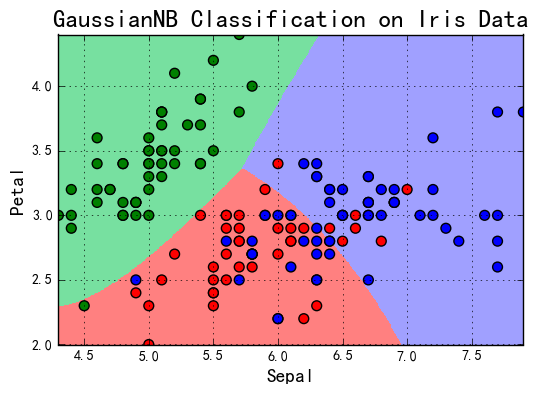

In [4]:

# Plot
N, M = 500, 500     # grid
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # meshgrid
x_test = np.stack((x1.flat, x2.flat), axis=1)   



mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = gnb.predict(x_test)                  # predicted values
y_hat = y_hat.reshape(x1.shape)                 # reshape
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)    # scatter plot
plt.xlabel('Sepal', fontsize=14)
plt.ylabel('Petal', fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title('GaussianNB Classification on Iris Data', fontsize=18)
plt.grid(True)
plt.show()

    

In [5]:
# prediction accuracy on traing set
y_hat = gnb.predict(x)
y = y.reshape(-1)
# print(y)
result = y_hat == y
print (y_hat)
print (result)
acc = np.mean(result)
print ('Accuracy: %.2f%%' % (100 * acc))


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  1.
  2.  1.  2.  1.  2.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  2.  2.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  1.  2.  2.  1.  2.
  2.  2.  2.  1.  2.  1.  1.  2.  2.  2.  2.  1.  2.  1.  2.  1.  2.  2.
  1.  1.  1.  2.  2.  2.  1.  1.  1.  2.  2.  2.  1.  2.  2.  2.  1.  2.
  2.  2.  1.  2.  2.  1.]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False False False  True False  True False  True False  True
  True  True  True  True 

### Multinominal Naive Bayes

In [6]:

import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB


if __name__ == "__main__":
    np.random.seed(0)
    M = 20
    N = 5
    x = np.random.randint(2, size=(M, N))     # [low, high)
    x = np.array(list(set([tuple(t) for t in x])))
    # print('x:\n', x)
    M = len(x)
    y = np.arange(M)
    print ('Sample size：%d，features number：%d' % x.shape)
    print ('Sample：\n', x)
    mnb = MultinomialNB(alpha=1)    # GaussianNB()？
    mnb.fit(x, y)
    y_hat = mnb.predict(x)
    print ('Predicted Classfication：', y_hat)
    print ('Accuracy Rate：%.2f%%' % (100*np.mean(y_hat == y)))
    print ('Accuracy Rate from Built-in Function：', mnb.score(x, y))
    # from sklearn import metrics
    # print metrics.accuracy_score(y, y_hat)
    err = y_hat != y
    print('error \t', err)
    for i, e in enumerate(err):
        if e:
            print (y[i], '：\t', x[i], 'is classified  the same as', x[y_hat[i]])


Sample size：17，features number：5
Sample：
 [[1 1 0 1 0]
 [0 0 0 0 0]
 [0 0 1 1 0]
 [1 1 1 1 0]
 [1 1 0 0 0]
 [1 1 0 0 1]
 [1 1 1 0 1]
 [0 1 1 0 1]
 [0 1 0 1 1]
 [1 0 1 0 1]
 [0 1 0 0 1]
 [1 0 1 1 0]
 [0 1 1 0 0]
 [0 0 0 0 1]
 [1 0 0 1 0]
 [1 1 1 1 1]
 [0 1 1 1 1]]
Predicted Classfication： [ 0  0  2  3  4  5  6  7  8  9 10 11 12 13 14  1 16]
Accuracy Rate：88.24%
Accuracy Rate from Built-in Function： 0.882352941176
error 	 [False  True False False False False False False False False False False
 False False False  True False]
1 ：	 [0 0 0 0 0] is classified  the same as [1 1 0 1 0]
15 ：	 [1 1 1 1 1] is classified  the same as [0 0 0 0 0]


### Text 

In [1]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from time import time
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib as mpl
def test_clf(clf):
    print ('Classifier：', clf)
    alpha_can = np.logspace(-3, 2, 10)
    model = GridSearchCV(clf, param_grid={'alpha': alpha_can}, cv=5) # 5-fold CV
    m = alpha_can.size
    if hasattr(clf, 'alpha'):
        model.set_params(param_grid={'alpha': alpha_can})
        m = alpha_can.size
    if hasattr(clf, 'n_neighbors'):
        neighbors_can = np.arange(1, 15)
        model.set_params(param_grid={'n_neighbors': neighbors_can})
        m = neighbors_can.size
    if hasattr(clf, 'C'):
        C_can = np.logspace(1, 3, 3)
        gamma_can = np.logspace(-3, 0, 3)
        model.set_params(param_grid={'C':C_can, 'gamma':gamma_can})
        m = C_can.size * gamma_can.size
    if hasattr(clf, 'max_depth'):
        max_depth_can = np.arange(4, 10)
        model.set_params(param_grid={'max_depth': max_depth_can})
        m = max_depth_can.size
    t_start = time()
    model.fit(x_train, y_train)
    t_end = time()
    t_train = (t_end - t_start) / (5*m)
    print ('5-fold CV training time：%.3f s/(5*%d)=%.3f s' % ((t_end - t_start), m, t_train))
    print ('Hyperparameter：', model.best_params_)
    t_start = time()
    y_hat = model.predict(x_test)
    t_end = time()
    t_test = t_end - t_start
    print ('Test time：%.3f s' % t_test)
    acc = metrics.accuracy_score(y_test, y_hat)
    print ('Accuracy Rate on test set：%.2f%%' % (100 * acc))
    name = str(clf).split('(')[0]
    index = name.find('Classifier')
    if index != -1:
        name = name[:index]     # 去掉末尾的Classifier
    if name == 'SVC':
        name = 'SVM'
    return t_train, t_test, 1-acc, name


In [2]:

if __name__ == "__main__":
    print ('start downloading data...')
    t_start = time()
    # remove = ('headers', 'footers', 'quotes')
    remove = ()
    categories = 'alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space'
    # categories = None    
    data_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=0, remove=remove)
    data_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=0, remove=remove)
    t_end = time()
    print ('Download finished，took %.3f s' % (t_end - t_start))
    print ('Data type：', type(data_train))
    print ('Text from training：', len(data_train.data))
    print ('Text from testing：', len(data_test.data))
    print ('name of categories %d：' % len(categories))
    categories = data_train.target_names
    pprint(categories)
    y_train = data_train.target
    y_test = data_test.target
    print (' -- First 10 text -- ')
    for i in np.arange(10):
        print ('text %d(belongs to - %s)：' % (i+1, categories[y_train[i]]))
        print (data_train.data[i])
        print ('\n\n')
    vectorizer = TfidfVectorizer(input='content', stop_words='english', max_df=0.5, sublinear_tf=True)
    x_train = vectorizer.fit_transform(data_train.data)  # sparse x_train，scipy.sparse.csr.csr_matrix
    x_test = vectorizer.transform(data_test.data)
    print ('# Samples in training set ：%d， # features：%d' % x_train.shape)
    print ('stop words:\n'),
    pprint(vectorizer.get_stop_words())
    feature_names = np.asarray(vectorizer.get_feature_names())

    print ('\n\n===================\n comparison of classifiers：\n')
    clfs = (MultinomialNB(),                # 0.87(0.017), 0.002, 90.39%
            BernoulliNB(),                  # 1.592(0.032), 0.010, 88.54%
            KNeighborsClassifier(),         # 19.737(0.282), 0.208, 86.03%
            RidgeClassifier(),              # 25.6(0.512), 0.003, 89.73%
            RandomForestClassifier(n_estimators=200),   # 59.319(1.977), 0.248, 77.01%
            SVC()                           # 236.59(5.258), 1.574, 90.10%
            )
    result = []
    for clf in clfs:
        a = test_clf(clf)
        result.append(a)
        print ('\n')
    result = np.array(result)
    time_train, time_test, err, names = result.T
    x = np.arange(len(time_train))
    mpl.rcParams['font.sans-serif'] = [u'simHei']
    mpl.rcParams['axes.unicode_minus'] = False
    

start downloading data...
Download finished，took 0.483 s
Data type： <class 'sklearn.utils.Bunch'>
Text from training： 2034
Text from testing： 1353
name of categories 4：
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
 -- First 10 text -- 
text 1(belongs to - alt.atheism)：
From: healta@saturn.wwc.edu (Tammy R Healy)
Subject: Re: note to Bobby M.
Lines: 52
Organization: Walla Walla College
Lines: 52

In article <1993Apr14.190904.21222@daffy.cs.wisc.edu> mccullou@snake2.cs.wisc.edu (Mark McCullough) writes:
>From: mccullou@snake2.cs.wisc.edu (Mark McCullough)
>Subject: Re: note to Bobby M.
>Date: Wed, 14 Apr 1993 19:09:04 GMT
>In article <1993Apr14.131548.15938@monu6.cc.monash.edu.au> darice@yoyo.cc.monash.edu.au (Fred Rice) writes:
>>In <madhausC5CKIp.21H@netcom.com> madhaus@netcom.com (Maddi Hausmann) writes:
>>
>>>Mark, how much do you *REALLY* know about vegetarian diets?
>>>The problem is not "some" B-vitamins, it's balancing proteins.  
>>>There is also one vitam

# Samples in training set ：2034， # features：33809
stop words:

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being'

5-fold CV training time：236.881 s/(5*9)=5.264 s
Hyperparameter： {'C': 100.0, 'gamma': 0.031622776601683791}
Test time：1.594 s
Accuracy Rate on test set：90.10%




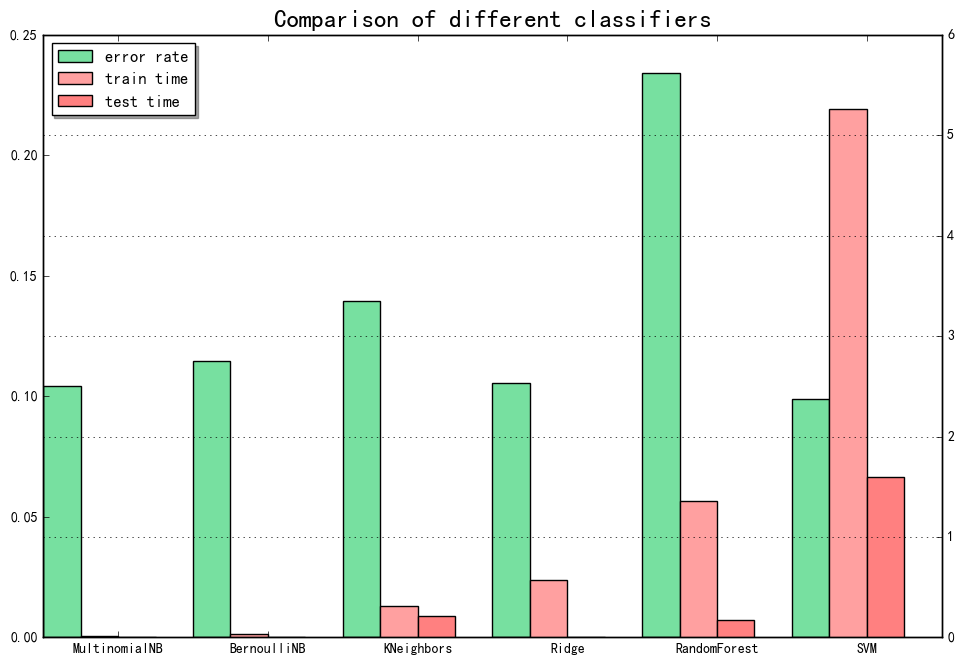

In [21]:
plt.figure(figsize=(10, 7), facecolor='w')
ax = plt.axes()
b1 = ax.bar(x, err.astype(np.float), width=0.25, color='#77E0A0')
ax_t = ax.twinx()
b2 = ax_t.bar(x+0.25, time_train.astype(np.float), width=0.25, color='#FFA0A0')
b3 = ax_t.bar(x+0.5, time_test.astype(np.float), width=0.25, color='#FF8080')
plt.xticks(x+0.5, names, fontsize=10)
leg = plt.legend([b1[0], b2[0], b3[0]], ('error rate', 'train time', 'test time'), loc='upper left', shadow=True)
# for lt in leg.get_texts():
#     lt.set_fontsize(14)
plt.title('Comparison of different classifiers', fontsize=18)
plt.xlabel('Classifier')
plt.grid(True)
plt.tight_layout(2)
plt.show()

